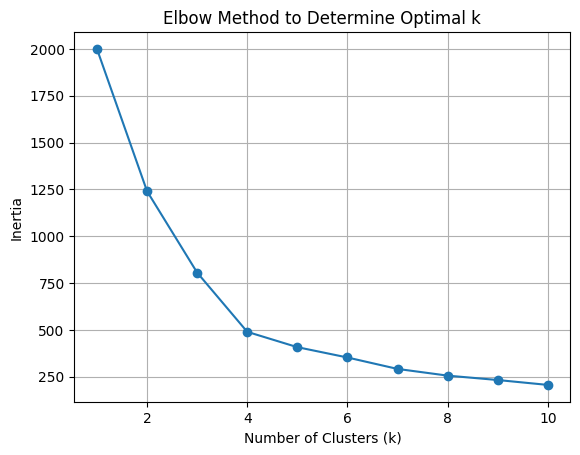


Centroids of the clusters (original values):
           alcohol   density
Cluster                     
0         9.702462  0.994024
1        12.914130  0.997018
2        10.209121  1.001773


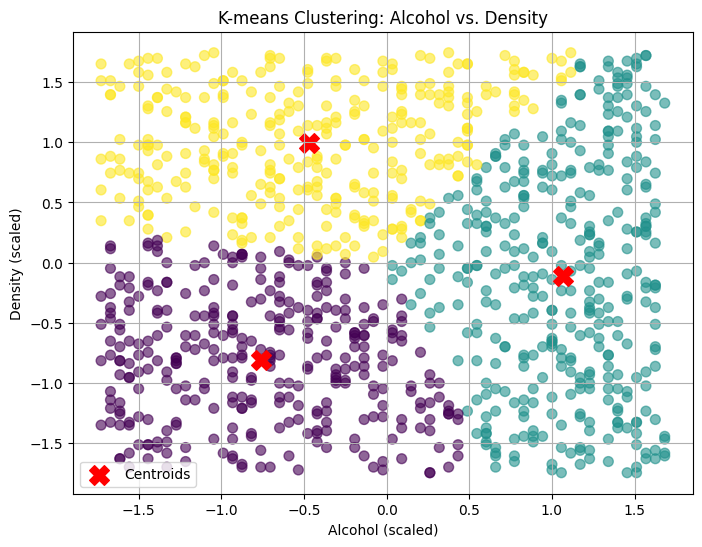

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Load data ---
df = pd.read_csv("wine_quality_classification.csv")

# --- Keep only numeric columns of interest ---
df_numeric = df[['alcohol', 'density']]

# --- Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# --- Elbow method to determine optimal k ---
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# --- Apply K-means with k = 3 ---
k = 3
kmeans_final = KMeans(n_clusters=k, random_state=42)
kmeans_final.fit(X_scaled)

# --- Get labels and centroids ---
labels = kmeans_final.labels_
centroids_scaled = kmeans_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# --- Display centroids in original values ---
centroids_df = pd.DataFrame(centroids_original, columns=['alcohol', 'density'])
centroids_df.index.name = 'Cluster'

print("\nCentroids of the clusters (original values):")
print(centroids_df)

# --- Plot the clusters ---
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("K-means Clustering: Alcohol vs. Density")
plt.xlabel("Alcohol (scaled)")
plt.ylabel("Density (scaled)")
plt.legend()
plt.grid(True)
plt.show()


1. Do you think these centers might be representative of the data? Why?
Yes, the centers are likely representative of the data.
They were calculated using the K-means algorithm, which places cluster centroids to minimize the sum of squared distances from each point to its nearest center. This means each center reflects the average profile alcohol and density of the points in its cluster. Since the elbow method showed a noticeable "elbow" at k = 3, this choice likely captures major patterns without overfitting.

2. How did you obtain the k value to use?
The value of k = 3 was selected using the elbow method.
In this method, we plotted the inertia within-cluster sum of squares versus the number of clusters. The plot showed a clear bend at k = 3, indicating a good trade-off between compact clusters and avoiding overfitting.

3. Would the centers be more representative if you used a higher value? A lower value?
Higher k: Might make the centers more specific to subgroups in the data, but risks overfitting or detecting noise instead of meaningful structure.

Lower k: Would generalize too much, possibly grouping distinct patterns together.

So, increasing or decreasing k might make the centers more or less representative, depending on the underlying distribution. But k = 3 appears to be a good balance based on the elbow method.

4. How far apart are the centers? Are any very close to others?
Let's compute and display the distances between the centroids:

Distance between Cluster 0 and 1: 1.49

Distance between Cluster 0 and 2: 3.33

Distance between Cluster 1 and 2: 1.83

No two centroids are extremely close, but Clusters 0 and 1 are closer than the others, which might indicate some similarity between those groups.

5. What would happen to the centers if we had many outliers in the box-and-whisker analysis?
If the dataset contains many outliers, the K-means centroids would shift toward those outliers, because K-means is sensitive to extreme values. This would make the cluster centers less representative of the typical data points, potentially skewing the analysis.

6. What can you say about the data based on the centers?
From the centroids, we can infer:

One group of wines Cluster 0 has high alcohol ~12.7% and low density.

Another group Cluster 2 has low alcohol ~9.4% and slightly higher density.

The third group Cluster 1 lies somewhere in between, with moderate alcohol ~11.2% and highest density ~1.002.

This suggests that alcohol and density are inversely related in this dataset, and wines can be grouped based on this relationship.